<a href="https://colab.research.google.com/github/majidsh97/VAE/blob/main/VAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets


In [89]:
import datasets
from torchsummary import summary
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
"""

lazwRow?
custom collaborate function

"""

data = datasets.load_dataset('fashion_mnist')
batch_size = 1000


train = data['train']#.select(range(100))
test_data = data['test']


data_transform=  transforms.Compose([
    #transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x*2-1)

])
def custom_collate_fn(batch):
    images = [data_transform(x['image']) for x in batch]
    labels = torch.tensor([x['label'] for x in batch])
    return torch.stack(images).cuda(), labels.cuda()

sampler = torch.utils.data.RandomSampler(train,num_samples=1000)
train_loader = DataLoader(train,batch_size, collate_fn=custom_collate_fn, sampler=sampler)


for image,label in train_loader:
  print(image.shape)
  print(image.max())
  print(image.min())
  break



torch.Size([1000, 1, 28, 28])
tensor(1., device='cuda:0')
tensor(-1., device='cuda:0')


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 12544]       3,223,808
         Unflatten-2            [-1, 256, 7, 7]               0
              ReLU-3            [-1, 256, 7, 7]               0
       BatchNorm2d-4            [-1, 256, 7, 7]             512
   ConvTranspose2d-5          [-1, 128, 14, 14]         295,040
              ReLU-6          [-1, 128, 14, 14]               0
       BatchNorm2d-7          [-1, 128, 14, 14]             256
   ConvTranspose2d-8          [-1, 128, 14, 14]         147,584
              ReLU-9          [-1, 128, 14, 14]               0
  ConvTranspose2d-10            [-1, 1, 28, 28]           1,153
             Tanh-11            [-1, 1, 28, 28]               0
Total params: 3,668,353
Trainable params: 3,668,353
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw

<Figure size 100x100 with 0 Axes>

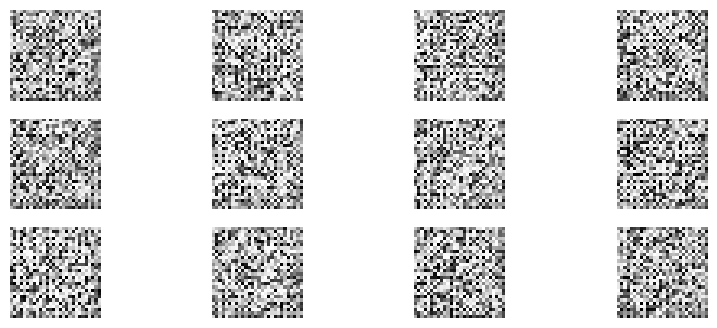

1 : 0.674 1.5039692 0.47198835
2 : 0.629 1.5024784 0.47379825
3 : 0.514 1.4971213 0.47559693
4 : 0.48 1.4963481 0.47503346
5 : 0.461 1.4964805 0.4745132
6 : 0.49 1.4971873 0.47524112
7 : 0.45 1.4961311 0.47522086
8 : 0.444 1.4953518 0.47492447
9 : 0.444 1.4951739 0.4753667
10 : 0.448 1.495927 0.47490138
11 : 0.499 1.4981833 0.47418478
12 : 0.547 1.4998628 0.4751277
13 : 0.459 1.495726 0.47516
14 : 0.49 1.4973106 0.47402278
15 : 0.523 1.4996247 0.4764408
16 : 0.42 1.4936745 0.4751872
17 : 0.441 1.4959185 0.47612983
18 : 0.517 1.4997017 0.47814226
19 : 0.37 1.4921234 0.47818986
20 : 0.417 1.4943491 0.47740793
21 : 0.467 1.4968302 0.4755745
22 : 0.498 1.4977878 0.4738019
23 : 0.562 1.5018587 0.47640774
24 : 0.404 1.4935763 0.47674507
25 : 0.498 1.4971759 0.47565463
26 : 0.49 1.4983511 0.47436813
27 : 0.556 1.5015271 0.47792873
28 : 0.389 1.4922945 0.47773814
29 : 0.449 1.4957905 0.47643566
30 : 0.484 1.496438 0.47493964
31 : 0.513 1.4988306 0.47914657
32 : 0.345 1.4894111 0.4786224
33 : 0

<Figure size 100x100 with 0 Axes>

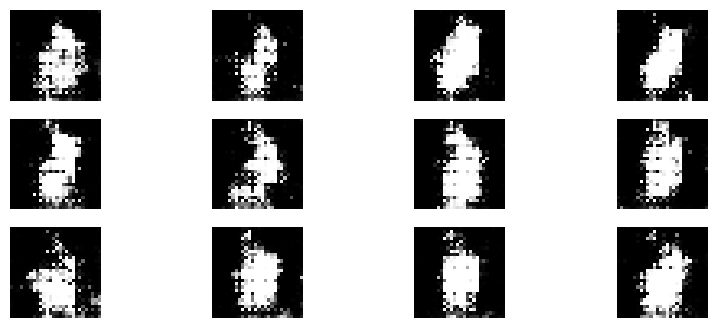

101 : 0.328 1.5085762 0.48137295
102 : 0.329 1.5088925 0.48018402
103 : 0.327 1.5076689 0.48047164
104 : 0.349 1.5099623 0.4794239
105 : 0.341 1.5107324 0.4800164
106 : 0.376 1.5111706 0.47961172
107 : 0.393 1.5128156 0.47809342
108 : 0.38 1.5111797 0.4790049
109 : 0.438 1.5155675 0.47757846
110 : 0.411 1.5142169 0.47741178
111 : 0.436 1.5157564 0.4762922
112 : 0.44 1.5163317 0.47603586
113 : 0.463 1.5176439 0.47583675
114 : 0.478 1.5188212 0.47512963
115 : 0.46 1.5180583 0.47467712
116 : 0.518 1.5196106 0.4849965
117 : 0.219 1.505485 0.48494938
118 : 0.228 1.5066683 0.48542708
119 : 0.225 1.5062376 0.48387104
120 : 0.24 1.5068407 0.4830185
121 : 0.246 1.5078235 0.48295408
122 : 0.292 1.510096 0.48223776
123 : 0.269 1.5098753 0.48176154
124 : 0.289 1.5104269 0.4823252
125 : 0.301 1.511304 0.4806221
126 : 0.296 1.5121299 0.48144636
127 : 0.325 1.5145369 0.4806152
128 : 0.338 1.5137489 0.4800549
129 : 0.351 1.5148702 0.47987008
130 : 0.358 1.5146248 0.47933102
131 : 0.398 1.5176246 0.478

<Figure size 100x100 with 0 Axes>

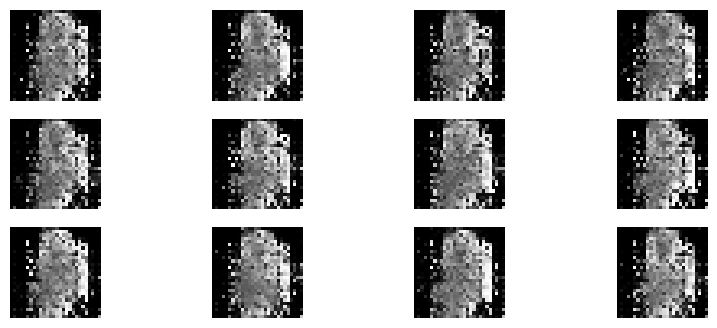

201 : 0.486 1.5190442 0.4746001
202 : 0.516 1.5208995 0.47642535
203 : 0.422 1.5157003 0.4759266
204 : 0.467 1.5169753 0.47488078
205 : 0.514 1.520665 0.4763104
206 : 0.434 1.516787 0.47631374
207 : 0.525 1.5187993 0.47630256
208 : 0.399 1.5135226 0.47588083
209 : 0.488 1.518136 0.47401345
210 : 0.535 1.5207694 0.47409913
211 : 0.489 1.518867 0.47399545
212 : 0.541 1.5212665 0.4753284
213 : 0.465 1.5177968 0.47483864
214 : 0.51 1.5208457 0.47617358
215 : 0.426 1.5172298 0.4762774
216 : 0.461 1.5184407 0.4750547
217 : 0.515 1.5230777 0.47684884
218 : 0.38 1.5163858 0.47727478
219 : 0.423 1.5203968 0.47579068
220 : 0.477 1.5211592 0.47434098
221 : 0.524 1.5238583 0.4769939
222 : 0.401 1.5202248 0.4772513
223 : 0.419 1.5210497 0.47635192
224 : 0.495 1.5245976 0.4751338
225 : 0.503 1.523525 0.47745553
226 : 0.334 1.518599 0.4781908
227 : 0.418 1.5222661 0.4769537
228 : 0.443 1.5228317 0.47537547
229 : 0.463 1.5241582 0.47473806
230 : 0.511 1.5257397 0.47812447
231 : 0.339 1.5202588 0.47859

<Figure size 100x100 with 0 Axes>

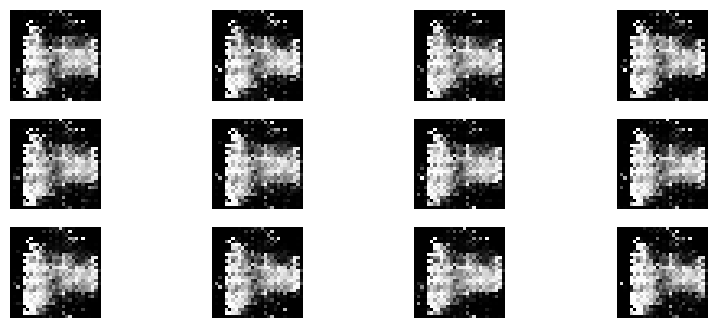

301 : 0.402 1.5245149 0.47649994
302 : 0.413 1.5255792 0.4762483
303 : 0.414 1.5245228 0.47644567
304 : 0.415 1.525959 0.47564253
305 : 0.404 1.5250227 0.47560567
306 : 0.442 1.5263004 0.475453
307 : 0.435 1.5269973 0.47599146
308 : 0.453 1.5266149 0.47522515
309 : 0.46 1.5274831 0.47506216
310 : 0.467 1.5276141 0.47473726
311 : 0.486 1.5270069 0.47513118
312 : 0.465 1.5271213 0.4751612
313 : 0.448 1.5261904 0.47509867
314 : 0.491 1.5270438 0.4741841
315 : 0.485 1.5275061 0.474577
316 : 0.483 1.5270463 0.4742585
317 : 0.483 1.5271146 0.47436187
318 : 0.543 1.530087 0.47954887
319 : 0.305 1.5179784 0.47890884
320 : 0.319 1.517324 0.4785184
321 : 0.294 1.5174183 0.47858274
322 : 

In [91]:
from torch.nn import Conv2d,ReLU,Linear,ConvTranspose2d,LeakyReLU,Tanh,Flatten,Unflatten,Sigmoid,AdaptiveAvgPool2d,Sequential,Dropout,LeakyReLU,BatchNorm2d

def kl_divergence(mean,std):
    normal = torch.distributions.Normal(torch.zeros_like(mean),torch.ones_like(std))
    p = torch.distributions.Normal(mean,std)
    kl = torch.distributions.kl_divergence(p,normal)
    loss = torch.mean(kl)
    return loss

mse = torch.nn.MSELoss()
f=128
pad=1
latent_size = 256

disc =  torch.nn.Sequential(
Conv2d(1,f,3,2,pad),
ReLU(),
#BatchNorm2d(f),
Dropout(),
Conv2d(f,2*f,3,2,pad),
ReLU(),
#BatchNorm2d(2*f),
Dropout(),
Flatten(),
Linear(2*f*7*7,1),
Sigmoid()
).cuda()

gen = torch.nn.Sequential(

Linear(latent_size,2*f*7*7),
Unflatten(1,(2*f,7,7)),
ReLU(),
BatchNorm2d(2*f),
ConvTranspose2d(2*f,f,3,2,pad,1),
ReLU(),
BatchNorm2d(f),
ConvTranspose2d(f,f,3,1,1),
ReLU(),
ConvTranspose2d(f,1,3,2,pad,1),
#ReLU(),
#ConvTranspose2d(1,1,3,1,1),

Tanh()
).cuda()


        

#summary(disc,(1,28,28),device="cuda")
summary(gen,(latent_size,),device="cuda")

glr = 1e-3*3
dlr = 1e-3
upe=3

gen_optim = torch.optim.RAdam(gen.parameters(),glr)
dis_optim = torch.optim.RAdam(disc.parameters(),dlr)
dis_optim.zero_grad()
gen_optim.zero_grad()

#torch.autograd.set_detect_anomaly(True)
def step(input,epoch)->torch.Tensor:

    

    """
    Note:: first one we should detach because we dont want to calculate gradients for get but in second time we call disc(gen_out)
    we want to cal gradients for gen that is why we dont detach it.
    difference between optimz.grad_zero and model.grad_zero: first zero all models grad and second just zero one model grad.
    there are ref in optim and model
    """
    out_disc_real = disc(input)
    loss_real_one = torch.mean(torch.binary_cross_entropy_with_logits(out_disc_real,torch.ones_like(out_disc_real)*0.9))
    loss_real_one.backward()


    noise = torch.normal(0,1,size=(input.shape[0],latent_size)).cuda()
    out_gen = gen(noise)
    out_disc_fake = disc(out_gen.detach())
    gscore= torch.sum( out_disc_fake>0.5).detach().cpu().numpy()/batch_size
    print(gscore,end=' ')

    loss_fake_zero = torch.mean(torch.binary_cross_entropy_with_logits(out_disc_fake,torch.zeros_like(out_disc_fake)) )
    loss_fake_zero.backward()
    loss_dis =  loss_real_one + loss_fake_zero 
    if gscore >= 0.5: #epoch % upe ==0:
        dis_optim.step()
        disc.zero_grad()
        #dis_optim.zero_grad()




    #gen.zero_grad()
    #gen_optim.zero_grad()


    out_disc_fake = disc(out_gen)

    loss_gen = torch.binary_cross_entropy_with_logits(out_disc_fake,torch.ones_like(out_disc_fake)) 
    loss_gen = torch.mean( loss_gen )

    if gscore < 0.5:
        loss_gen.backward()
        gen_optim.step()
        gen.zero_grad()

    #gen_optim.zero_grad()

    #gen.zero_grad()


    return loss_dis , loss_gen
    pass


def show_preds(input,image=None):
    preds = input
    if image==None:
        preds = (gen(input)+1)/2
        preds =  preds.moveaxis(1,-1)
        #print(preds.shape)
        preds=preds.cpu().detach().numpy()
    plt.figure(figsize=(1,1))
    fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 4))
    axs = axs.flatten()

    for i in range(preds.shape[0]):
        ax = axs[i]
        ax.imshow(preds[i],cmap='gray',interpolation='none')
        ax.axis('off')
    plt.show()

disc_loss = []
gen_loss = []
for epoch in range(2000*5):
    print(epoch,": " , end='')
    for image,label in train_loader:

        loss_dis , loss_gen = step(image,epoch)
        #print(loss)
        disc_loss.append(loss_dis.cpu().detach().numpy())
        gen_loss.append(loss_gen.cpu().detach().numpy())

        
        pass

    print(disc_loss[-1],gen_loss[-1])
    if epoch%100==0:
        noise = torch.normal(0,1,size=(12,latent_size)).cuda()
        show_preds(noise)
    #break

plt.plot(disc_loss)
plt.plot(gen_loss)
plt.show()

<Figure size 100x100 with 0 Axes>

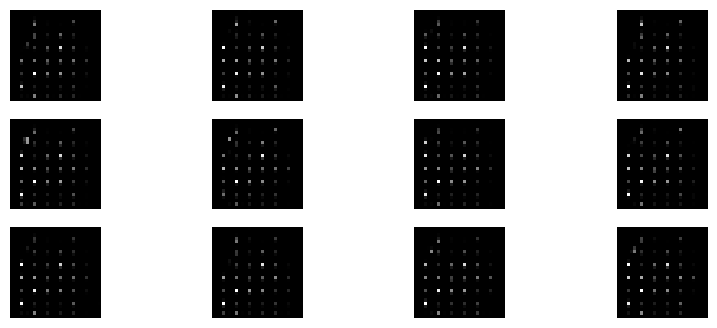

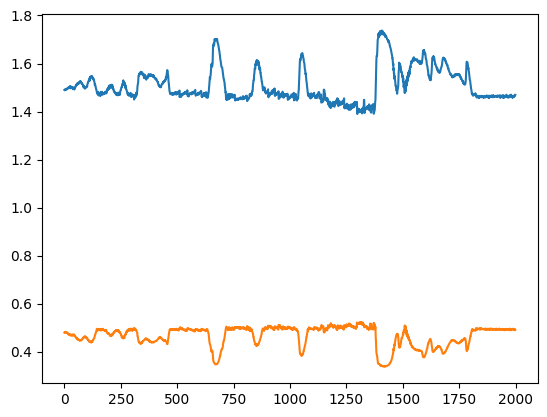

In [86]:



noise = torch.normal(0,1,size=(12,latent_size)).cuda()
show_preds(noise)

plt.plot(disc_loss)
plt.plot(gen_loss)


torch.Size([12, 28, 28, 1])


<Figure size 100x100 with 0 Axes>

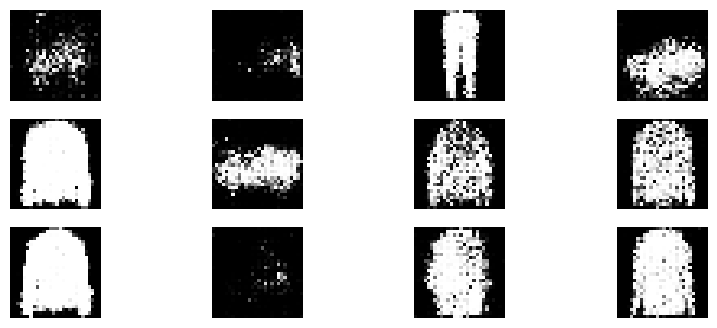

<Figure size 100x100 with 0 Axes>

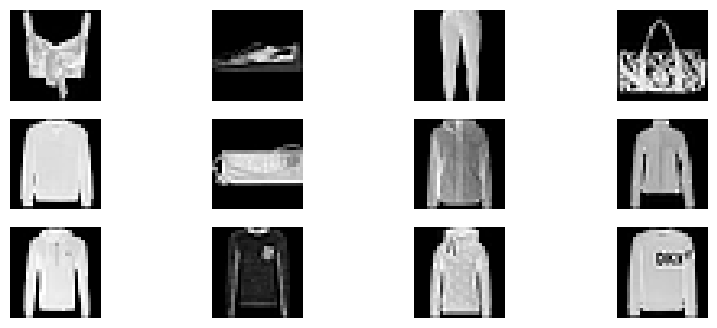

In [181]:
import torch.utils
import torch.utils.data


#test_data = test
sampler = torch.utils.data.RandomSampler(test_data,num_samples=1000)
test_loader = DataLoader(test_data,1000,collate_fn=custom_collate_fn,sampler=sampler)

image,lable = next(iter(test_loader))
show_preds(image[:12])
show_preds(image[:12].cpu().moveaxis(1,-1),True)




In [99]:
latent=0
def f(m,input,output):
    global latent
    latent=output

encoder_decoder.encoder[-1].register_forward_hook(f)

image,label = next(iter(test_loader))
pred = encoder_decoder.forward(image)[0]
#print(pred.shape)
plt.figure(figsize=(2,2))
fig,axs =plt.subplots(1,2)
axs[0].imshow(image[0].cpu().moveaxis(0,-1).numpy())
axs[0].set_title('image')
axs[1].imshow(pred[0].cpu().detach().moveaxis(0,-1).numpy())
axs[1].set_title('prediction')
plt.show()

latent=latent.detach().cpu()
t = latent
print(t.shape)
print(label.cpu().shape)
print(t[:,0].max())
plt.scatter(t[:,0],t[:,latent_size],c=label.cpu(),marker='.')




AttributeError: 'Encoder_Decoder' object has no attribute 'encoder'

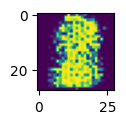

In [239]:
sample_ = torch.normal(0,1,size=(1,latent_size)).cuda()
#        out_d1 = self.decoder1(out_d2+z1)
pred:torch.Tensor = encoder_decoder.decoder2(sample_)
sample2 = torch.normal(0,1,size=pred.shape).cuda()

pred:torch.Tensor = encoder_decoder.decoder1(pred+sample2)

plt.figure(figsize=(1,1))
plt.imshow(pred[0].detach().cpu().moveaxis(0,-1))

In [ ]:
"""   self.c1 =  Conv2d(1,f,3,2,pad)
        self.r1= ReLU()
        self.c2= Conv2d(f,2*f,3,2,pad)
        self.r2= ReLU()
        self.f= Flatten()
        self.l1= Linear(2*f*7*7,256)
        self.l2= Linear(256,latent_size*2)

            

        self.ul2 = Linear(latent_size,256)
        self.ul1 = Linear(256,2*f*7*7)
        self.uf= Unflatten(1,(2*f,7,7))
        self.uc2 = ConvTranspose2d(2*f,f,3,2,pad,1)
        self.ur2 =ReLU()
        self.uc1= ConvTranspose2d(f,1,3,2,pad,1)
        self.s = Sigmoid()"""

<H1>Notes</H1>
normalization have huge imapact accidentally divide 255.0 and it wouldnt generate good samples

In [ ]:
"""from torch.nn import Conv2d,ReLU,Linear,ConvTranspose2d,LeakyReLU,Tanh,Flatten,Unflatten,Sigmoid,AdaptiveAvgPool2d,Sequential


def kl_divergence(mean,std):
    normal = torch.distributions.Normal(torch.zeros_like(mean),torch.ones_like(std))
    p = torch.distributions.Normal(mean,std)
    kl = torch.distributions.kl_divergence(normal,p)
    loss = torch.mean(kl)
    return loss

mse = torch.nn.MSELoss()
f=128
pad=1
latent_size = 128
class GANs(torch.nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.disc =  torch.nn.Sequential(
        Conv2d(1,f,3,2,pad),
        ReLU(),
        
        Conv2d(f,2*f,3,2,pad),
        ReLU(),
        Flatten(),
        Linear(2*f*7*7,1),
        Sigmoid()
            )

        self.gen = torch.nn.Sequential(

        Linear(latent_size,256),
        Linear(256,2*f*7*7),
        Unflatten(1,(2*f,7,7)),
        ConvTranspose2d(2*f,f,3,2,pad,1),
        ReLU(),
        ConvTranspose2d(f,1,3,2,pad,1),
        Sigmoid()
        )

    def forward(self,input):
        out_disc_real = self.disc(input)
        noise = torch.normal(0,1,size=(input.shape[0],latent_size)).cuda()
        out_gen = self.gen(noise)
        out_disc_fake = self.disc(out_gen)
        return out_disc_real, out_disc_fake, out_gen
        pass

    #Tanh()

gans = GANs().cuda()
summary(gans,(1,28,28),device="cuda")

lr = 1e-3
optim = torch.optim.RAdam(gans.parameters(),lr,weight_decay=1e-5)
optim = torch.optim.RAdam(gans.parameters(),lr,weight_decay=1e-5)


def step(x)->torch.Tensor:
    optim.zero_grad()
    out_disc_real ,out_disc_fake, out_gen= gans.forward(x)
    #print(out_disc_real.shape)
    loss_dis = torch.binary_cross_entropy_with_logits(out_disc_real,torch.ones_like(out_disc_real)) + \
    torch.binary_cross_entropy_with_logits(out_disc_fake,torch.zeros_like(out_disc_fake)) 
    loss_dis = torch.mean( loss_dis )
    loss_gen = torch.binary_cross_entropy_with_logits(out_disc_fake,torch.ones_like(out_disc_fake)) 
    loss_gen = torch.mean( loss_gen )

    #print(loss_dis.shape)
    #mse(output,y) +1/2*( kl_divergence(mean,std) + kl_divergence(mean1,std1))
    loss_dis.backward(retain_graph=True)
    loss_gen.backward()
    optim.step()
    return loss_dis , loss_gen
    pass

disc_loss = []
gen_loss = []
for epoch in range(500):
    for image,label in train_loader:

        loss_dis , loss_gen = step(image)
        #print(loss)
        disc_loss.append(loss_dis.cpu().detach().numpy())
        gen_loss.append(loss_dis.cpu().detach().numpy())

        
        pass

    print(epoch,': ',disc_loss[-1],gen_loss[-1])
    #break

plt.plot(disc_loss)
plt.plot(gen_loss)"""